# Let's see if it's working

In [12]:
import torch

import matplotlib.pyplot as plt

from nn.sequential import *
from nn.activation import *
from nn.linear import *
from nn.loss import *
from trainer import Trainer

In [13]:
def gen_data(n):
    x = torch.rand((2 * n, 2))
    pi = torch.acos(torch.zeros(1)).item() * 2
    target = ((x - torch.Tensor([0.5, 0.5])).pow(2).sum(dim=1) <= 1/(2*pi)) * 1

    x_train, x_test = x[:n], x[n:]
    y_train, y_test = target[:n], target[n:]
    return x_train, x_test, y_train.view(-1, 1), y_test.view(-1, 1)

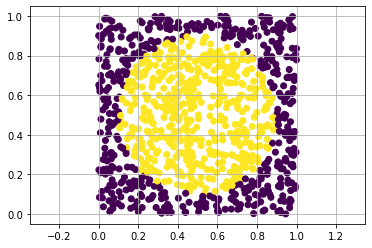

In [14]:
# Create test data
x_train, x_test, y_train, y_test = gen_data(1000)

# Plot test data
plt.scatter(x_train.numpy()[:,0], x_train.numpy()[:,1], c=y_train[:, 0])
plt.axis('equal')
plt.grid()
plt.show()

In [19]:
def init_model():
    net = Sequential((
    Linear(2, 25),
    ReLU(),
    Linear(25, 25),
    ReLU(),
    Linear(25, 25),
    ReLU(),
    Linear(25, 25),
    ReLU(),
    Linear(25,1)),
    MSELoss())
    return net

In [20]:
LinNet_ours = init_model()

LinNet_ours.print()

nb_epochs = 100
t = Trainer(nb_epochs=nb_epochs)
_ = t.fit(LinNet_ours, x_train, y_train, x_test, y_test, batch_size=32, optim='sgd', print_every=int(nb_epochs*0.1), lr=0.01)

Sequential((
Linear(in_features=2, out_features=25, bias=True), 
ReLU(), 
Linear(in_features=25, out_features=25, bias=True), 
ReLU(), 
Linear(in_features=25, out_features=25, bias=True), 
ReLU(), 
Linear(in_features=25, out_features=25, bias=True), 
ReLU(), 
Linear(in_features=25, out_features=1, bias=True), 
))
# Epoch   1/100:	 loss=2.6000e-01	 loss_val=2.5000e-01
# Epoch  11/100:	 loss=2.5000e-01	 loss_val=2.5000e-01
# Epoch  21/100:	 loss=2.5000e-01	 loss_val=2.5000e-01
# Epoch  31/100:	 loss=2.5000e-01	 loss_val=2.5000e-01
# Epoch  41/100:	 loss=2.4000e-01	 loss_val=2.4000e-01
# Epoch  51/100:	 loss=2.4000e-01	 loss_val=2.4000e-01
# Epoch  61/100:	 loss=2.3000e-01	 loss_val=2.3000e-01
# Epoch  71/100:	 loss=2.2000e-01	 loss_val=2.2000e-01
# Epoch  81/100:	 loss=2.1000e-01	 loss_val=2.1000e-01
# Epoch  91/100:	 loss=1.8000e-01	 loss_val=1.7000e-01


In [18]:
### Using SGD only

# Search parameters
n_epochs = 100
n_samples = 1000
n_folds = 5

# Search grid
lrs = torch.logspace(start=-1, end=-3, steps=5)
batch_sizes = torch.Tensor([16, 32, 64]).int()

x_train, x_test, y_train, y_test = gen_data(n_samples)

best_test_error = 1
best_lr = -1
best_bs = -1
for lr in lrs:
    for bs in batch_sizes:
        test_error = 0
        for _ in range(n_folds):
            LinNet = init_model()

            t = Trainer(nb_epochs=nb_epochs)
            _ = t.fit(LinNet, x_train, y_train, x_test, y_test, batch_size=bs, optim='sgd', verbose=False, lr=lr)

            y_test_pred = LinNet(x_test).round()
            test_error += (y_test_pred != y_test).sum() / n_samples

        av_test_error = test_error / n_folds

        print(f"# Lr={lr}, bs={bs}, error rate={av_test_error*100}%")

        if av_test_error < best_test_error:
            best_test_error = av_test_error
            best_lr = lr
            best_bs = bs

print(f"\nBest learning: {best_lr}    Best batch_size: {best_bs}")
print(f"Best test error: {best_test_error}")

# Lr=0.10000000149011612, bs=16, error rate=9.039999961853027%
# Lr=0.10000000149011612, bs=32, error rate=11.880001068115234%
# Lr=0.10000000149011612, bs=64, error rate=3.359999418258667%
# Lr=0.03162277489900589, bs=16, error rate=10.539999961853027%
# Lr=0.03162277489900589, bs=32, error rate=11.80000114440918%
# Lr=0.03162277489900589, bs=64, error rate=10.119999885559082%
# Lr=0.009999999776482582, bs=16, error rate=6.019999980926514%
# Lr=0.009999999776482582, bs=32, error rate=12.459999084472656%
# Lr=0.009999999776482582, bs=64, error rate=19.26000213623047%
# Lr=0.003162277629598975, bs=16, error rate=12.779998779296875%
# Lr=0.003162277629598975, bs=32, error rate=26.3799991607666%
# Lr=0.003162277629598975, bs=64, error rate=37.0%
# Lr=0.0010000000474974513, bs=16, error rate=26.780000686645508%
# Lr=0.0010000000474974513, bs=32, error rate=35.040000915527344%
# Lr=0.0010000000474974513, bs=64, error rate=38.62000274658203%

Best learning: 0.10000000149011612    Best batch_